In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")

In [6]:
df.head(2)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949


In [7]:
movie_titles.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [9]:
df = pd.merge(df,movie_titles,  on='item_id')

In [10]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Name: rating, dtype: float64

In [18]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(3)

title
Star Wars (1977)    584
Contact (1997)      509
Fargo (1996)        508
Name: rating, dtype: int64

In [19]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [21]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [22]:
ratings

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<AxesSubplot:>

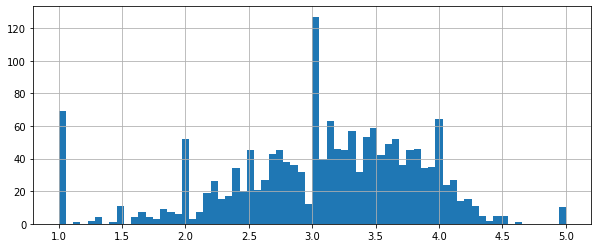

In [32]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

<AxesSubplot:>

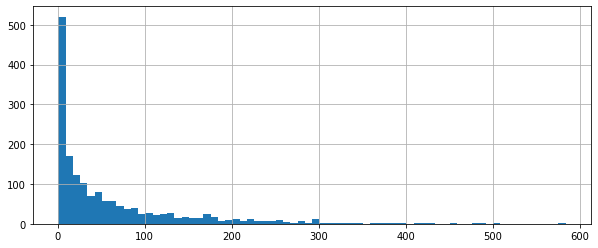

In [33]:
plt.figure(figsize=(10,4))
ratings['no of ratings'].hist(bins=70)

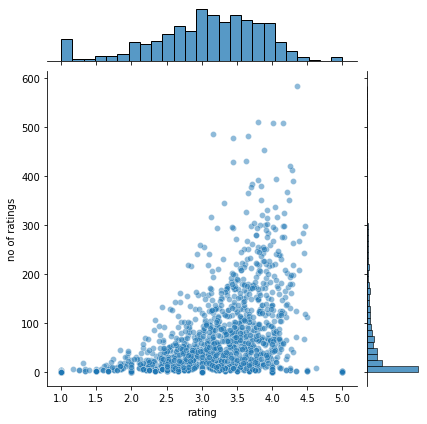

In [37]:
import seaborn as sns
sns.jointplot(x='rating',y='no of ratings', data=ratings, alpha=.5)

In [38]:
df.head(2)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)


In [39]:
ratings.head(2)

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5


In [44]:
moviemat = df.pivot_table(index='user_id',columns='title', values='rating')

In [47]:
moviemat.head(2)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN


In [48]:
ratings.sort_values('no of ratings', ascending=False).head(2)

,rating,no of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509


In [51]:
Contact_user_ratings=moviemat['Contact (1997)']

In [54]:
similar_to_contact=moviemat.corrwith(Contact_user_ratings)

In [56]:
corr_Contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_Contact.head(2)

,Correlation
title,
'Til There Was You (1997),0.904534
1-900 (1994),NaN


In [58]:
corr_Contact.dropna(inplace=True)

In [60]:
corr_Contact.sort_values(by='Correlation',ascending=False)

,Correlation
title,
Lamerica (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Contact (1997),1.0
...,...
Dingo (1992),-1.0
Romper Stomper (1992),-1.0
Hearts and Minds (1996),-1.0


In [61]:
corr_Contact = corr_Contact.join(ratings['no of ratings'])

In [65]:
corr_Contact[corr_Contact['no of ratings']>100].sort_values('Correlation', ascending=False)

,Correlation,no of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
...,...,...
Snow White and the Seven Dwarfs (1937),-0.182526,172
"Ice Storm, The (1997)",-0.186964,108
Some Like It Hot (1959),-0.204401,128


# Purchase

In [78]:
df= pd.read_csv('./data/Training Data.csv')
target= pd.read_csv('./data/Training Data Target.csv')
test_data= pd.read_csv('./data/Test Data.csv')
sample= pd.read_csv('./data/Sample Submission.csv')

In [67]:
# train = 1,1,1,2,2,2,2,3,3,3,4,4,5,5,5,6,6
# target= 1,    2,      3                        # train label 1 prediction for each id
# test =              7,7,7,8,8,8,9,10,10
# sample=             7,    8,    9,10           # test label 3 prediction but all in same row

In [77]:
df.tail(3)

,user_id,aov,category
257404,2114,559.0,Back to School
257405,35741,18451.0,Phones
257406,36769,12529.0,Phones


In [79]:
df.groupby('category')['aov'].mean().sort_values(ascending=False).head(3)

category
Laptops              43965.429025
TVs                  42058.262707
Consumer Durables    27850.628591
Name: aov, dtype: float64

In [80]:
df.groupby('category')['aov'].count().sort_values(ascending=False).head(3)

category
Phones        66341
Fashion       60327
Home Decor    29703
Name: aov, dtype: int64

In [81]:
ratings = pd.DataFrame(df.groupby('category')['aov'].mean())

In [83]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('category')['aov'].count())

In [88]:
ratings.sort_values('no of ratings', ascending=False).head(3)

,aov,no of ratings
category,,
Phones,16369.680137,66341
Fashion,699.874418,60327
Home Decor,326.879877,29703


<AxesSubplot:>

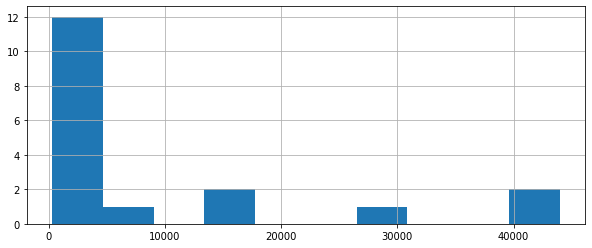

In [93]:
plt.figure(figsize=(10,4))
ratings['aov'].hist(bins=10)

<AxesSubplot:>

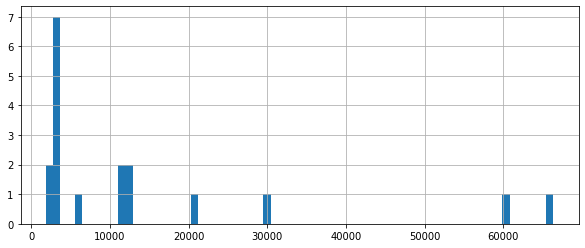

In [94]:
plt.figure(figsize=(10,4))
ratings['no of ratings'].hist(bins=70)

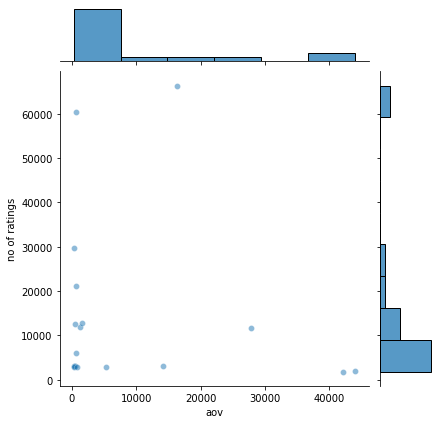

In [96]:
import seaborn as sns
sns.jointplot(x='aov',y='no of ratings', data=ratings, alpha=.5)

In [99]:
df.head(2)

,user_id,aov,category
0,37327,29128.0,Phones
1,37327,354.0,Fashion


In [98]:
purchasemat = df.pivot_table(index='user_id',columns='category', values='aov')

In [105]:
purchasemat.head(2)

category,Back to School,Beauty Products,Board Games,Books,Consumer Durables,Ereaders,Fashion,Fitness,Gaming,Groceries,Home Decor,Kitchen cleaning Supplies,Laptops,Painiting Supplies,Pet Supplies,Phones,TVs,Toys
user_id,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,708.0,6028.0,NaN,447.0,NaN,NaN,NaN,NaN,NaN,10216.000000,NaN,424.0
4,355.0,NaN,NaN,NaN,NaN,10555.0,621.5,NaN,NaN,2224.0,578.0,NaN,NaN,NaN,NaN,12928.666667,NaN,NaN


<AxesSubplot:xlabel='category', ylabel='user_id'>

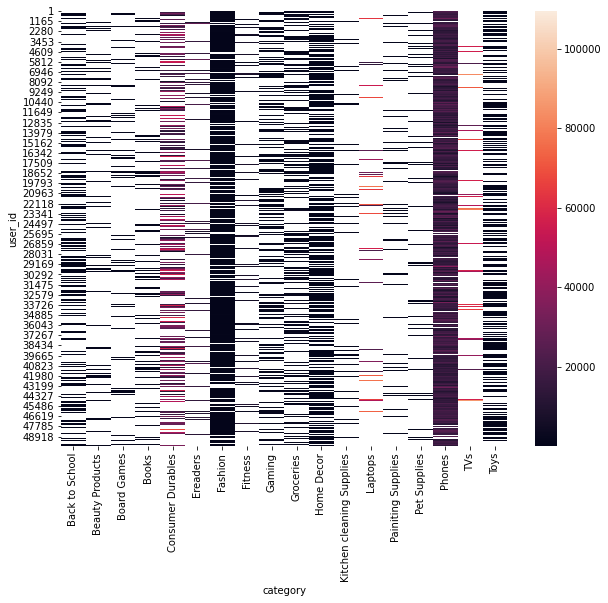

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(purchasemat)

In [107]:
ratings.sort_values('no of ratings', ascending=False).head()

,aov,no of ratings
category,,
Phones,16369.680137,66341
Fashion,699.874418,60327
Home Decor,326.879877,29703
Toys,726.540605,21106
Groceries,1543.407806,12810


In [108]:
# Fashion

In [231]:
Fashion_aov = purchasemat['Fashion']

In [232]:
similar_to_Fashion = purchasemat.corrwith(Fashion_aov)

In [233]:
corr_Fashion= pd.DataFrame(similar_to_Fashion, columns=['Correlation'])

In [234]:
corr_Fashion.dropna(inplace=True)

In [235]:
corr_Fashion.sort_values('Correlation',ascending=False)

,Correlation
category,
Fashion,1.000000
Laptops,0.042688
Home Decor,0.005413
Toys,0.004122
Gaming,0.001734
Kitchen cleaning Supplies,0.001298
Groceries,0.001255
Phones,0.000282
Fitness,0.000053


In [236]:
corr_Fashion.sort_values('Correlation',ascending=False).index[:2].values

array(['Fashion', 'Laptops'], dtype=object)

In [237]:
## Still not good correlation

In [238]:
corr_Fashion = corr_Fashion.join(ratings['no of ratings'])

In [239]:
corr_Fashion[corr_Fashion['no of ratings']>1000].sort_values('Correlation',ascending=False)

,Correlation,no of ratings
category,,
Fashion,1.000000,60327
Laptops,0.042688,1888
Home Decor,0.005413,29703
Toys,0.004122,21106
Gaming,0.001734,11937
Kitchen cleaning Supplies,0.001298,3205
Groceries,0.001255,12810
Phones,0.000282,66341
Fitness,0.000053,2945


In [310]:
def find_best_match(item_name,n):
    item_aov = purchasemat[item_name]
    similar_to_item= purchasemat.corrwith(item_aov)
    corr_item= pd.DataFrame(similar_to_item, columns=['Correlation'])
    corr_item.dropna(inplace=True)
    corr_item=corr_item.join(ratings['no of ratings'])
    corr_item = corr_item[corr_item['no of ratings']>n].sort_values('Correlation', ascending=False)
    #return corr_item['Correlation'][1:4].sum()
    return list(corr_item.index[1:4].values)
    #return ', '.join(list(corr_item.index[1:4].values))
    #return corr_item

In [311]:
find_best_match('TVs',1000)

['Beauty Products', 'Laptops', 'Groceries']

In [194]:
ratings['no of ratings'].max(), ratings['no of ratings'].min()

(66341, 1869)

In [195]:
## we need to find best cuttoff for this no of ratings so that it gives a good correlation

In [199]:
categories=ratings.index.values
categories

array(['Back to School', 'Beauty Products', 'Board Games', 'Books',
       'Consumer Durables', 'Ereaders', 'Fashion', 'Fitness', 'Gaming',
       'Groceries', 'Home Decor', 'Kitchen cleaning Supplies', 'Laptops',
       'Painiting Supplies', 'Pet Supplies', 'Phones', 'TVs', 'Toys'],
      dtype=object)

In [242]:
max_corr_sum=[]
max_corr_n =[]

for n in range(1,2000,100):
    corr_val=0
    for item in categories:
        corr_val += find_best_match(item, n)
    print(n, 'corr_val:',corr_val)
    max_corr_sum.append(corr_val)
    max_corr_n.append(n)
        

1 corr_val: 2.443896291367232
101 corr_val: 2.443896291367232
201 corr_val: 2.443896291367232
301 corr_val: 2.443896291367232
401 corr_val: 2.443896291367232
501 corr_val: 2.443896291367232
601 corr_val: 2.443896291367232
701 corr_val: 2.443896291367232
801 corr_val: 2.443896291367232
901 corr_val: 2.443896291367232
1001 corr_val: 2.443896291367232
1101 corr_val: 2.443896291367232
1201 corr_val: 2.443896291367232
1301 corr_val: 2.443896291367232
1401 corr_val: 2.443896291367232
1501 corr_val: 2.443896291367232
1601 corr_val: 2.443896291367232
1701 corr_val: 2.443896291367232
1801 corr_val: 2.443896291367232
1901 corr_val: 2.105798218116133


In [312]:
map_dict={}
for item in categories:
    map_dict[item] = find_best_match(item,1000)

In [313]:
map_dict

{'Back to School': ['Gaming', 'Board Games', 'Ereaders'],
 'Beauty Products': ['TVs', 'Pet Supplies', 'Consumer Durables'],
 'Board Games': ['Toys', 'Groceries', 'Laptops'],
 'Books': ['Fitness', 'Pet Supplies', 'Laptops'],
 'Consumer Durables': ['Ereaders', 'Laptops', 'Books'],
 'Ereaders': ['Home Decor', 'Groceries', 'TVs'],
 'Fashion': ['Laptops', 'Home Decor', 'Toys'],
 'Fitness': ['Pet Supplies', 'Books', 'Painiting Supplies'],
 'Gaming': ['Painiting Supplies', 'Back to School', 'Phones'],
 'Groceries': ['Kitchen cleaning Supplies', 'Pet Supplies', 'TVs'],
 'Home Decor': ['Ereaders', 'Toys', 'Fashion'],
 'Kitchen cleaning Supplies': ['Groceries', 'Toys', 'Laptops'],
 'Laptops': ['Painiting Supplies', 'Books', 'Toys'],
 'Painiting Supplies': ['Fitness', 'Gaming', 'Laptops'],
 'Pet Supplies': ['Fitness', 'Beauty Products', 'Groceries'],
 'Phones': ['Kitchen cleaning Supplies', 'Gaming', 'Ereaders'],
 'TVs': ['Beauty Products', 'Laptops', 'Groceries'],
 'Toys': ['Fitness', 'Laptops',

In [266]:
sample.head(2)

,user_id,pred3
0,43323,"Laptops, Fashion, Consumer Durables"
1,4269,"Laptops, Fashion, Consumer Durables"


In [275]:
item1=test_data[test_data['user_id']==43323].sort_values('aov', ascending=False)
item1

,Unnamed: 0,user_id,aov,category
6,6,43323,41480.0,Consumer Durables
1,1,43323,29309.0,Phones
3,3,43323,23548.0,Phones
0,0,43323,19115.0,Phones
2,2,43323,15293.0,Phones
5,5,43323,1017.0,Fashion
11,11,43323,867.0,Fashion
4,4,43323,751.0,Fashion
9,9,43323,642.0,Books
8,8,43323,610.0,Fashion


In [ ]:
# Let's make three selections
1) 3 max price items pick the most frequent
2) 3 mostFrequent items pick the most frequent
3) in all categores ever bought pick the most frequent
4) max money spent on which category

In [ ]:
1) max money spent on single item
2) most frequent purchase
3) most money spent on whole category

In [302]:
# 1)
a =item1.iloc[0,3]
a

'Consumer Durables'

In [303]:
# 2)
b=item1.value_counts('category').index[0]
b

'Fashion'

In [304]:
# 3)
c=item1.groupby('category')['aov'].sum().sort_values(ascending=False).index[0]
c

'Phones'

In [305]:
map_dict['Fashion']

'Laptops, Home Decor, Toys'

In [307]:
a, b,c

('Consumer Durables', 'Fashion', 'Phones')

In [358]:
from collections import Counter

def fun_cat(id):
    item1=test_data[test_data['user_id']==id].sort_values('aov', ascending=False)
    a =item1.iloc[0,3]
    b=item1.value_counts('category').index[0]
    c=item1.groupby('category')['aov'].sum().sort_values(ascending=False).index[0]
    print(a,b,c)
    list_all = [a,b,c]
    list_all+= map_dict[a] + map_dict[b] + map_dict[c]
    my_list=[word for word, word_count in Counter(list_all).most_common(3)]
    return ', '.join(my_list)

In [359]:
dummy_sample = sample.copy()
dummy_sample.head(2)

,user_id,pred3
0,43323,"Laptops, Fashion, Consumer Durables"
1,4269,"Laptops, Fashion, Consumer Durables"


In [360]:
dummy_sample['pred3'] = sample['user_id'].apply(fun_cat)

Consumer Durables Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Phones Phones
Consumer Durables Phones Consumer Durables
Phones Groceries Phones
Laptops Phones Phones
Consumer Durables Toys Consumer Durables
Consumer Durables Phones Phones
Phones Phones Phones
TVs Phones Phones
Groceries Fashion Groceries
Phones Home Decor Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
TVs Fashion TVs
Consumer Durables Home Decor Phones
Phones Toys Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Laptops Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
TVs Phones TVs
Consumer Durables Home Decor Consumer Durables
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durab

Consumer Durables Fashion Phones
Laptops Fashion Phones
Consumer Durables Fashion Phones
TVs Fashion TVs
Consumer Durables Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Books Phones
Laptops Fashion Laptops
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Phones Home Decor Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Back to School Phones
TVs Home Decor TVs
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Consumer Durables Toys Phones
Ereaders Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Gaming Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Consumer Durables Fashion Consumer Durabl

Phones Home Decor Phones
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
Phones Back to School Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Ereaders Fashion Ereaders
TVs Phones TVs
Phones Fashion Phones
Phones Fashion Phones
Gaming Gaming Gaming
Phones Phones Phones
Phones Phones Phones
Phones Toys Phones
Phones Toys Phones
Fashion Fashion Fashion
Phones Phones Phones
TVs Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Laptops Phones Phones
Phones Phones Phones
Fashion Fashion Fashion
Consumer Durables Phones Phones
Phones Toys Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Laptops Fashion Phones
Consumer Durables Ph

Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Laptops Phones Phones
Phones Fashion Phones
Laptops Fashion Laptops
Phones Phones Phones
TVs Groceries TVs
Phones Phones Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Beauty Products Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
TVs Fashion TVs
Phones Phones Phones
Phones Phones Phones
Phones Gaming Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
TVs Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
TVs Phones TVs
TVs Phones Phones
Consumer Durables Fashion Consumer Durables
Toys Fashion Fashion


Consumer Durables Fashion Consumer Durables
Laptops Fashion Laptops
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Laptops Fashion Laptops
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Laptops Phones Laptops
Phones Fashion Phones
Consumer Durables Gaming Phones
Laptops Phones Phones
Phones Fashion Phones
Laptops Phones Phones
Laptops Phones Laptops
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Laptops Fashion Laptops
Phones Gaming Phones
Phones Gaming Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Home Decor Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
TVs

Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Phones Consumer Durables
Gaming Books Gaming
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Laptops Fashion Phones
Phones Board Games Phones
Phones Fashion Phones
Laptops Phones Laptops
TVs Fashion TVs
Phones Fashion Phones
Laptops Phones Laptops
Phones Fashion Phones
Phones Phones Phones
Phones Board Games Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
TVs Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Ereaders Groceries Ereaders
Phones Home Decor Phones
Phones Home Decor Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
TVs Fashion TVs
Consumer Durables Fashion Consumer Durables
Ereaders Fashion Phones
Laptops Home Decor Laptops
Phones Groceries Phones
Phones Phones Phones
Phones Fashion Phone

Phones Phones Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Groceries Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Home Decor Phones
TVs Phones TVs
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Beauty Products Consumer Durables
Phones Phones Phones
Laptops Phones Laptops
Laptops Phones Phones
Phones Books Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home De

Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Phones Home Decor Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Books Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Phones Phones
Toys Beauty Products Toys
Laptops Home Decor Phones
Phones Phones Phones
Phones Back to School Phones
Consumer Durables Toys Consumer Durables
Fashion Home Decor Fashion
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Consumer Durables
TVs Fashion Phones
TVs Phones Phones
TVs Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Back to School Phones
Laptops Fashion Laptops
Ereaders Home Decor Phones
Phones Fashion Phones
Laptops Phones Phones

Phones Phones Phones
Phones Home Decor Phones
Consumer Durables Fashion Phones
Phones Phones Phones
TVs Phones Phones
Phones Phones Phones
Laptops Fashion Laptops
Phones Back to School Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Fashion Fashion Fashion
Consumer Durables Phones Phones
Phones Gaming Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Gaming Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Phones Phones
TVs Phones TVs
Phones Fashion Phones
Phones Fashion Phones
Ereaders Fashion Ereaders
Consumer Durables Fashion Phones
Phones Back to School Phones
Consumer Durables Fashion Consumer Durables
Laptops Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Consumer Durables Fas

Consumer Durables Phones Phones
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
Consumer Durables Phones Consumer Durables
Phones Phones Phones
Phones Phones Phones
Phones Board Games Phones
Phones Fashion Phones
Phones Groceries Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Phones Phones
Ereaders Ereaders Ereaders
Phones Fashion Phones
Consumer Durables Toys Consumer Durables
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Beauty Products Phones
Laptops Phones Laptops
Phones Fashion Phones
Fashion Fashion Fashion
Phones Fashion Phones
Phones Fashion Phones
Laptops Phones Phones
Laptops Phones Laptops
Fashion Fashion Fashion
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
TVs Fashion TVs
Consumer Durables Fashion Consumer Durables
Phones Back to School Phones
Phones Groceries Phones
TVs Phones Phones
TVs

Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Home Decor Phones
Phones Phones Phones
Consumer Durables Phones Phones
Laptops Fashion Laptops
Consumer Durables Home Decor Consumer Durables
Laptops Fashion Laptops
TVs Phones Phones
Consumer Durables Fashion Phones
Phones Beauty Products Phones
Laptops Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Ereaders Fashion Ereaders
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Consumer Durables Gaming Consumer Durables
TVs Phones Phones
Phones Phones Phones
Phones Fashion Phones
Fashion Fashion Fashion
Laptops Phones Laptops
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
TVs Fashion T

Phones Home Decor Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Books Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Home Decor Consumer Durables
Consumer Durables Toys Consumer Durables
Laptops Fashion Laptops
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Laptops Phones Laptops
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Laptops Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Toys Fashion Toys
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Home Decor P

Phones Phones Phones
Consumer Durables Gaming Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
TVs Fashion TVs
Consumer Durables Phones Phones
Phones Back to School Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Laptops Phones Phones
Consumer Durables Phones Consumer Durables
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Books Phones
Laptops Back to School Laptops
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Consumer Durables Phones Phones
TVs Fashion TVs
Groceries Groceries Groceries
Phones Fashion Phones
Consumer Durables Phones Phones
Consu

Laptops Home Decor Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
TVs Home Decor Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
TVs Phones Phones
Phones Fashion Phones
TVs Phones TVs
Ereaders Ereaders Ereaders
Consumer Durables Phones Phones
Laptops Phones Phones
Phones Phones Phones
Phones Groceries Phones
Laptops Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Gaming Phones
Phones Fashion Phones
Phones Home Decor Phones
TVs Fashion TVs
Consumer Durables Home Decor Phones
Consumer Durables Fashion Consumer Durables
Phones Home Decor Phones
Consumer Durables Phones Phones
TVs Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Laptops Phones Phones
Phones Phones Phones
Lapt

Phones Fashion Phones
Consumer Durables Phones Phones
Laptops Fashion Laptops
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Home Decor Phones
TVs Phones TVs
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Groceries Phones
Phones Home Decor Phones
Phones Phones Phones
TVs Home Decor TVs
Laptops Fashion Phones
Phones Phones Phones
Phones Groceries Phones
Phones Fashion Phones
TVs Phones TVs
Phones Home Decor Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Home Decor Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Home Decor Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Phones Phones
Laptops Phones Laptops
TVs Phones Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion 

Phones Fashion Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Home Decor Phones
Phones Back to School Phones
Consumer Durables Fashion Consumer Durables
Laptops Phones Laptops
Laptops Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Fashion Fashion Fashion
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Phones Phones
Fitness Fashion Fashion
Consumer Durables Back to School Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Groceries Back to School Groceries
Consumer Durables Fashion Phones
Consumer Durables Fashion Consumer Durables
Laptops Phones Phones
Phones Home Decor Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Consumer Durables Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
TVs Fashi

Gaming Home Decor Home Decor
Phones Home Decor Phones
Phones Fitness Phones
Consumer Durables Home Decor Consumer Durables
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Home Decor Phones
Consumer Durables Fashion Phones
Phones Back to School Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Fashion Back to School Fashion
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Laptops Phones Phones
Phones Phones Phones
Consumer Durables Back to School Consumer Durables
Phones Fashion Phones
Consumer Durables Fashion Phones
Ereaders Fashion Ereaders
Consumer Durables Phones Phones
Phones Fashion Phones
Consumer 

Phones Back to School Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Home Decor Phones
Consumer Durables Phones Phones
TVs Fashion TVs
Phones Fashion Phones
Phones Toys Phones
Consumer Durables Phones Phones
Laptops Phones Phones
Phones Phones Phones
Phones Gaming Phones
Laptops Fashion Laptops
Phones Gaming Phones
Phones Phones Phones
Ereaders Fashion Phones
Phones Books Phones
Phones Fashion Phones
Laptops Fashion Phones
Phones Phones Phones
Phones Back to School Phones
Consumer Durables Home Decor Phones
Fitness Back to School Fitness
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Laptops Fashion Laptops
Phones Fashion Phones
Consumer Durables Phone

Phones Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Gaming Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Gaming Beauty Products Gaming
Phones Fashion Phones
TVs Fashion TVs
Toys Fashion Toys
Phones Toys Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Books Phones
Phones Fashion Phones
Phones Back to School Phones
Consumer Durables Phones Consumer Durables
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Laptops Phones Phones
Phones Phones Phones
Phones Toys Phones
TVs Phones Phones
Laptops Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Ereaders Toys Ereaders
Phones Fashion Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
TVs Phones TVs
Phone

Laptops Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Gaming Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Laptops Phones Phones
Phones Fashion Phones
Phones Phones Phones
Laptops Home Decor Laptops
Gaming Fashion Fashion
Phones Phones Phones
Consumer Durables Phones Phones
Fashion Fashion Fashion
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
TVs Phones TVs
Phones Phones Phones
Phones Fashion Phones
Gaming Gaming Gaming
Phones Toys Phones
Gaming Fashion Gaming
Consumer Durables Home Decor Phones
Phones Toys Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Toys Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consume

Phones Home Decor Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Back to School Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Gaming Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Groceries Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Home Decor Phones
Phones Phones Phones
TVs Phones Phones
Ereaders Fashion Ereaders
Phones Phones Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Books Phones
Phones Phones Phones
Phones Fashion Phones
Phones Back to School Phones
Consumer Durables Books Consumer Durables
Phones Fashion Phones
Phones Fashion Phones
Phones Gaming Phones
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
Fashion Fashion Fashio

Phones Ereaders Phones
Phones Fashion Phones
Phones Phones Phones
Phones Back to School Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Toys Consumer Durables
Consumer Durables Phones Consumer Durables
Phones Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Gaming Fashion Fashion
Consumer Durables Phones Phones
Ereaders Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Gaming Phones
Phones Fashion Phones
Phones Groceries Phones
Fashion Fashion Fashion
Phones Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Phones Books Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Groceries Fashion Fashion
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Back to School Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion 

Consumer Durables Phones Phones
Phones Back to School Phones
Phones Back to School Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Fashion Fashion Fashion
Consumer Durables Phones Consumer Durables
TVs Back to School Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Laptops Phones Phones
Fashion Fashion Fashion
Phones Groceries Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Groceries Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
TVs Phones Phones
Groceries Fashion Groceries
Consumer Durables Fashion Phones
Phones Fashion Phones
Laptops Home Decor Phones
Consumer Durables Home Decor Consumer Durables
Phones Phon

Phones Phones Phones
Phones Gaming Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Gaming Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Laptops Fashion Laptops
Phones Back to School Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Gaming Phones
Phones Back to School Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Phones
Phones Back to School Phones
Phones Home Decor Phones
Phones Gaming Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Toys Phones
Laptops Fashion Laptops
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Ereaders Fashion Phones
Phones Back to School Phones


Consumer Durables Fashion Phones
Phones Board Games Phones
Toys Toys Toys
Consumer Durables Back to School Phones
TVs Toys TVs
Consumer Durables Home Decor Phones
Phones Phones Phones
Phones Phones Phones
Laptops Phones Phones
Laptops Phones Laptops
Consumer Durables Toys Consumer Durables
Consumer Durables Phones Phones
Laptops Groceries Laptops
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Gaming Fashion Gaming
Groceries Home Decor Groceries
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Phones Phones
Phones Gaming Phones
Consumer Durables Phones Consumer Durables
Phones Back to School Phones
Toys Home Decor Toys
Phones Phones Phones
Laptops Fashion Laptops
Phones Back to School Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Fashion Fashion Fashion
Phones Beauty Products Phones
Consumer Durables Fashion Phones
Phones Groceries Phones
Laptops Fashion L

Phones Back to School Phones
Laptops Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Gaming Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Groceries Phones
TVs Fashion TVs
Toys Back to School Toys
Phones Fashion Phones
Phones Groceries Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Fashion Fashion Fashion
Consumer Durables Home Decor Phones
Phones Phones Phones
Phones Phones Phones
Fashion Fashion Fashion
Consumer Durables Phones Phones
Fashion Fashion Fashion
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Laptops Toys Laptops
Phones Phones Phones
Phones Groceries Phones
Consumer Durables Fashion Consumer Durables
Gaming Fashion Gaming
Phones Phones Phones
Phones Toys Phones
Phones Fashion Phones
Pho

Consumer Durables Home Decor Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Gaming Phones
Phones Phones Phones
Laptops Fashion Phones
Phones Board Games Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Laptops Fashion Laptops
Consumer Durables Phones Consumer Durables
Laptops Phones Laptops
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Phones Home Decor Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Kitchen cleaning Supp

Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Consumer Durables Home Decor Consumer Durables
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Ereaders Home Decor Ereaders
Phones Fashion Phones
Phones Home Decor Phones
Laptops Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Phones
Phones Fashion Phones
Ereaders Phones Ereaders
Consumer Durables Fashion Phones
Fashion Fashion Fashion
Phones Groceries Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Fashion Back to School Fashion
Phones Books Phones
Phones Phones Phones
Groceries Fashion Groceries
Fashion Fashion Fashion
Phones Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Home Decor Phones
Consumer Durables Home Decor Consumer Durables
Phones Phones Phones


Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Fashion Phones
Ereaders Back to School Ereaders
Laptops Fashion Laptops
Phones Gaming Phones
Phones Fashion Phones
Phones Gaming Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Fashion Fashion Fashion
Phones Groceries Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Phones Back to School Phones
Phones Fashion Phones
Fashion Fashion Fashion
Phones Groceries Phones
Phones Home Decor Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Ereaders Phones
Phones Books Phones
Fa

Phones Kitchen cleaning Supplies Phones
Ereaders Back to School Ereaders
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Toys Books Toys
Phones Fashion Phones
Ereaders Ereaders Phones
Toys Fashion Fashion
Phones Kitchen cleaning Supplies Phones
Home Decor Back to School Home Decor
Phones Phones Phones
Phones Toys Phones
Ereaders Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Back to School Phones
Phones Phones Phones
Phones Fashion Phones
Toys Fashion Toys
Phones Fashion Phones
Phones Back to School Phones
Phones Home Decor Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Fashion Phones
Groceries Home Decor Groceries
Phones Fashion Phones
Phones Board Games Phones
Phones Fashion Phones
Phones Toys Phones
Gaming Back to School Gaming
Phones Fashion Phones
Phones Home Decor Phones
Fashion Fashion Fashion
Fashion Fashion Fashion
Phones Phones Phones
Gaming Back to School Gaming
Phones Fashion Phones
Phones

Consumer Durables Toys Consumer Durables
Consumer Durables Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Groceries Fashion Fashion
Consumer Durables Fashion Phones
Phones Groceries Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Consumer Durables
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Back to School Phones
Phones Home Decor Phones
TVs Phones TVs
Phones Phones Phones
Consumer Durables Home Decor Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Back to School Phones
Laptops Phones Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Home Decor Phones
Phones Fa

Consumer Durables Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
TVs Phones Phones
Phones Phones Phones
Consumer Durables Home Decor Phones
Phones Gaming Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Phones Phones
Laptops Fashion Laptops
Phones Phones Phones
Consumer Durables Gaming Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Home Decor Phones
Laptops Fashion Laptops
Consumer Durables Phones Consumer Durables
Phones Back to School Phones
Consumer Durables Fashion Consumer Durables
Ereaders Ereaders Ereaders
Phones Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Pho

Phones Fashion Phones
TVs Fashion TVs
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Back to School Phones
Consumer Durables Phones Phones
Consumer Durables Back to School Consumer Durables
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Back to School Phones
Phones Phones Phones
Phones Fashion Phones
TVs Phones TVs
Phones Fashion Phones
Consumer Durables Home Decor Phones
Consumer Durables Home Decor Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Gaming Fashion Toys
Consumer Durables Phones Phones
Phones Gaming Phones
Consumer Durables Back to School Consumer Durables
Phones Phones Phones
Phones Fashion Phones
TVs Phones Phones
Phones Fashion Phones
Consumer Durables Home Decor Ph

Phones Fashion Phones
TVs Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fitness Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Laptops Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Groceries Phones
TVs Phones TVs
Phones Fitness Phones
Phones Back to School Phones
Phones Fashion Phones
Phones Gaming Phones
Phones Groceries Phones
Phones Phones Phones
Phones Gaming Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Groceries Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phon

Phones Fashion Phones
Consumer Durables Fashion Phones
TVs Phones Phones
Consumer Durables Phones Consumer Durables
Consumer Durables Phones Phones
TVs Phones TVs
Phones Fashion Phones
Fashion Fashion Fashion
Laptops Phones Laptops
TVs Phones Phones
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Phones Phones
Laptops Fashion Laptops
Consumer Durables Phones Phones
Consumer Durables Home Decor Consumer Durables
Consumer Durables Gaming Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Laptops Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Home Decor Phones
Consumer Durables Phones Phones
TVs Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Laptops Phones Phones
Phones Home Decor 

Phones Gaming Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Groceries Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Phones Phones
Laptops Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Groceries Groceries Groceries
Phones Fashion Phones
Phones Back to School Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Fashion Phones
Laptops Phones Phones
Phones Home Decor Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
TVs Phones TVs
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Laptops Phones Phones
Phones Fashion Phones
Cons

Phones Fashion Phones
Phones Fashion Phones
Phones Groceries Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Laptops Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Laptops Fashion Phones
Phones Home Decor Phones
Consumer Durables Phones Consumer Durables
Phones Back to School Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Back to School Phones
Phones Phones Phones
Phones Home Decor Phones
Ereaders Home Decor Phones
Ereaders Groceries Ereaders
TVs Home Decor TVs
Groceries Fashion Groceries
Phones Fashion Phones
Gaming Back to School Back to School
Laptops Phones Phones
Phones Phones Phones
Laptops Phones Phones
TVs Phones Phones
Consumer Durables Phones 

Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Toys Consumer Durables
Phones Phones Phones
Fitness Fashion Fitness
Laptops Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Board Games Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Back to School Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Ereaders Groceries Phones
Phones Fashion Phones
Phones Fashion Phones
TVs Home Decor TVs
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
TVs Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Books Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Beauty Products Phones
Consumer Durables 

Consumer Durables Phones Phones
Phones Phones Phones
Phones Gaming Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Gaming Fashion Gaming
Phones Fashion Phones
Phones Beauty Products Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Fashion Home Decor Fashion
Ereaders Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
TVs Home Decor TVs
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Books Phones
Phones Phones Phones
Phones Phones Phones
Phones 

Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
TVs Fashion TVs
Consumer Durables Fashion Consumer Durables
Laptops Fashion Phones
Gaming Fashion Fashion
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Groceries Phones
TVs Home Decor TVs
Groceries Fashion Pet Supplies
Toys Fashion Fashion
Phones Home Decor Phones
Consumer Durables Phones Phones
TVs Fashion Phones
Phones Fashion Phones
Ereaders Phones Phones
Phones Books Phones
TVs Fashion TVs
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Home Decor Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Ereaders Ereaders Ereaders
Phones Gaming Phones
Consum

Consumer Durables Gaming Phones
Consumer Durables Home Decor Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Back to School Phones
Consumer Durables Home Decor Consumer Durables
Gaming Toys Fashion
Phones Toys Phones
Consumer Durables Fashion Phones
Consumer Durables Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Phones Toys Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
Consumer Durables Home Decor Phones
TVs Home Decor TVs
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Laptops Phones Laptops
Consumer Durables Phones Phones
Phones Phones Phones
Phones Toys Phones
Con

Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Books Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Ereaders Ereaders Ereaders
Consumer Durables Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Gaming Phones
Phones Gaming Phones
Ereaders Fashion Ereaders
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Phones Home Decor Phones
Phones Back to School Phones
Phones Gaming Phones
Phones Fashion Phones
Phones Phones Phones
Phones Gaming Phones
Phones Fashion Phones
Laptops Phones Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Phones Home Decor Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Groceries Phones
Phones Gaming Phones
Phones Fashion Phones
Fashion Fashion Fashion
Phones Phon

Phones Fashion Phones
Phones Back to School Phones
Phones Phones Phones
Phones Back to School Phones
Phones Phones Phones
Laptops Phones Laptops
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Phones Phones
TVs Fashion TVs
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Gaming Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fitness Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Beauty Products Phones
Phones Phones Phones
Consumer Durables Phones Phones
TVs Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Back to School Phones
Phones Home Decor Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Home Decor Phones
Laptops F

TVs Groceries Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Home Decor Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Back to School Phones
Phones Fashion Phones
Laptops Phones Laptops
Phones Fashion Phones
Phones Fashion Phones
Groceries Home Decor Groceries
Phones Home Decor Phones
Groceries Fashion Groceries
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Beauty Products Phones
Consumer Durables Fashion Phones
Consumer Durables Back to School Consumer Durables
Phones Phones Phones
Consumer Durables Phones Consumer Durables
Consumer Durables Phones Phones
Consumer Durables Phones Consumer Durables
Ereaders Ereaders Ereaders
Consumer Durables Fashion Consumer Durables
Consumer Durables Phones Phones
Consumer Durables

Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Toys Phones
Phones Phones Phones
Phones Fashion Phones
Fitness Home Decor Fitness
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Ereaders Ereaders Ereaders
Phones Fitness Phones
Laptops Fashion Laptops
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Gaming Phones
Consumer Durables Fashion Phones
Ereaders Fashion Ereaders
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Laptops Fashion Laptops
Phones Phones Phones
Laptops Phones Phones
Consumer Durables Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer D

Phones Home Decor Phones
Laptops Phones Phones
Phones Gaming Phones
TVs Phones Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
TVs Home Decor TVs
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Ereaders Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Back to School Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Consumer Durables Toys Phones
Phones Phones Phones
Phones Phones Phones
Laptops Fashion Phones
Phones Gaming Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Ph

Phones Toys Phones
Phones Fashion Phones
Phones Phones Phones
Laptops Phones Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
TVs Phones TVs
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Groceries Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Laptops Phones Laptops
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
TVs Fashion TVs
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer 

Phones Back to School Phones
Ereaders Gaming Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Ereaders Home Decor Ereaders
Phones Phones Phones
TVs Gaming Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Back to School Phones
Phones Beauty Products Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Phones Phones
Laptops Phones Phones
Phones Back to School Phones
Consumer Durables Phones Phones
Phones Back to School Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Phones Phones
C

Phones Board Games Phones
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Consumer Durables Fashion Phones
Laptops Fashion Laptops
Consumer Durables Fashion Phones
Laptops Back to School Laptops
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Beauty Products Fashion Fashion
TVs Phones Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Books Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Consumer Durables Back to School Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Back to School Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
TVs Phones TV

Phones Home Decor Phones
Consumer Durables Fashion Consumer Durables
Phones Home Decor Phones
Phones Phones Phones
Phones Groceries Phones
Phones Toys Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Laptops Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Groceries Phones
Consumer Durables Phones Phones
TVs Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Phones Groceries Phones
Phones Groceries Phones
TVs Phones TVs
Phones Fashion Phones
Phones Painiting Supplies Phones
Phones Toys Phones
Phones Groceries Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Consumer Durables Phones 

Consumer Durables Fashion Phones
Consumer Durables Home Decor Consumer Durables
Phones Fashion Phones
Toys Toys Toys
Phones Fashion Phones
Phones Toys Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
TVs Fashion TVs
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Laptops Books Laptops
Phones Phones Phones
Phones Home Decor Phones
Ereaders Fashion Ereaders
Phones Home Decor Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Pet Supplies Phones
Phones Home Decor Phones
Phones Home Decor Phones
Consumer Durables Home Decor Phones
Phones Fashion Phones
Phones Home Decor Phones
Ereaders Toys Ereaders
Phones Home Decor Phones
Pho

Phones Home Decor Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Board Games Phones
Phones Phones Phones
Phones Home Decor Phones
Toys Fashion Toys
Laptops Phones Laptops
Phones Phones Phones
Phones Phones Phones
Phones Back to School Phones
Laptops Phones Laptops
Phones Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Groceries Phones
Ereaders Ereaders Ereaders
Consumer Durables Phones Phones
Laptops Fashion Laptops
Consumer Durables Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Ereaders Phones Phones
Phones Fashion Phones
Phones Books Phones
Consumer Durables Phones Phone

Consumer Durables Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Toys Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Laptops Fashion Laptops
Consumer Durables Fashion Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Groceries Fashion Fashion
Phones Toys Phones
Consumer Durables Phones Phones
Consumer Durables Phones Phones
Ereaders Back to School Ereaders
Ereaders Gaming Ereaders
Ereaders Fashion Ereaders
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Phones Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Ereaders Ereaders Ereaders
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
P

Phones Groceries Phones
Phones Fashion Phones
Consumer Durables Phones Phones
TVs Home Decor TVs
Phones Phones Phones
Laptops Fashion Laptops
Phones Phones Phones
Fashion Fashion Fashion
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Laptops Fashion Laptops
Phones Board Games Phones
Consumer Durables Phones Consumer Durables
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Back to School Phones
Phones Gaming Phones
Phones Phones Phones
Phones Fashion Phones
TVs Phones Phones
Phones Phones Phones
Phones Back to School Phones
Gaming Fashion Gaming
Phones Gaming Phones
Phones Phones Phones
Phones Home Decor Phones
Laptops Phones Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Board Games Phones
Phones Phones Phones
Phones Fashion Phones
L

Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Home Decor Consumer Durables
Gaming Gaming Gaming
Phones Fashion Phones
Consumer Durables Phones Consumer Durables
TVs Phones TVs
Phones Phones Phones
Phones Toys Phones
Phones Fashion Phones
Phones Phones Phones
Books Fashion Fashion
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Books Phones
Consumer Durables Books Consumer Durables
Phones Phones Phones
Phones Fashion Phones
Phones Back to School Phones
Phones Fashion Phones
Fashion Fashion Fashion
Phones Phones Phones
Ereaders Toys Ereaders
Phones Fashion Phones
Consumer Durables Home Decor Consumer Durables
Phones Phones Phones
Phones Books Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Pho

Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
TVs Phones Phones
Laptops Fashion Laptops
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Home Decor Phones
Consumer Durables Fashion Phones
Phones Back to School Phones
Phones Phones Phones
Laptops Phones Phones
Phones Phones Phones
Phones Gaming Phones
Consumer Durables Phones Phones
Laptops Fashion Laptops
Phones Back to School Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Gaming Gaming Gaming
Phones Fashion Phones
Phones Groceries Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Laptops Phones Phones
Fashion Back to School Back to School
Phones Fashion Phones
Phones Phones Phones
Consumer D

Consumer Durables Fashion Phones
Phones Fashion Phones
Fitness Fashion Fitness
Phones Fashion Phones
Phones Phones Phones
Consumer Durables Fashion Phones
Phones Back to School Phones
TVs Home Decor Phones
Phones Phones Phones
Back to School Fashion Fashion
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Fashion Phones
Consumer Durables Phones Consumer Durables
Phones Gaming Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Consumer Durables Phones Phones
Consumer Durables Fashion Phones
Phones Phones Phones
Laptops Phones Phones
Phones Fashion Phones
Phones Home Decor Phones
Laptops Phones Phones
Phones Phones Phones
Phones Fashion Phones
Phones Fashion Phones
Laptops Fashion Laptops
Phones Toys Phones
Consumer Durables Fashion Phones
Phones Toys Phones
Phones Fashion Phones
Consumer Durables Fas

Phones Board Games Phones
Groceries Fashion Groceries
Phones Toys Phones
Phones Phones Phones
Ereaders Ereaders Ereaders
Phones Fashion Phones
Consumer Durables Home Decor Consumer Durables
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Consumer Durables
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Phones Phones
Toys Fashion Toys
Laptops Fashion Laptops
TVs Phones Phones
Phones Phones Phones
Groceries Fashion Fashion
Consumer Durables Phones Phones
Phones Back to School Phones
Phones Back to School Phones
Phones Home Decor Phones
Groceries Fashion Groceries
Phones Back to School Phones
Phones Fashion Phones
Phones Gaming Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Toys Phones
Phones Fashion Phones
Phones Gaming Phones
Phones Fashion Phones
TVs Fashion TVs
Ereaders Home Decor Ereaders
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Fa

Phones Phones Phones
Gaming Gaming Gaming
Phones Home Decor Phones
Phones Back to School Phones
Phones Fashion Phones
Toys Toys Toys
Back to School Back to School Back to School
Phones Back to School Phones
TVs Fashion Phones
Fashion Fashion Fashion
Phones Phones Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Fashion Phones
Phones Home Decor Phones
Phones Fashion Phones
Phones Back to School Phones
Consumer Durables Phones Phones
Phones Fashion Phones
Phones Board Games Phones
Phones Gaming Phones
Phones Back to School Phones
Ereaders Ereaders Ereaders
Toys Fashion Toys
Phones Fashion Phones
Phones Fashion Phones
Phones Phones Phones
Phones Home Decor Phones
Gaming Fashion Fashion
Phones Fashion Phones
Phones Back to School Phones
Phones Phones Phones
Beauty Products Beauty Products Beauty Products
Toys Fashion Toys
Phones Fashion Phones
Consumer Durables Fashion Consumer Durables
Phones Fashion Phones
Phones Back to School Phones
Phones Books Phones

In [362]:
dummy_sample.tail(3)

,user_id,pred3
19978,25357,"Phones, Kitchen cleaning Supplies, Gaming"
19979,49936,"Phones, Kitchen cleaning Supplies, Gaming"
19980,50037,"Groceries, Kitchen cleaning Supplies, Pet Supp..."


In [367]:
dummy_sample.to_csv('./Submissions/sub1.csv',index=False)